*Experiment-4*

**Aim: A_star path planning algorithm.**

**Theory:**
It is a searching algorithm that is used to find the shortest path between an initial and a final point.
It is a handy algorithm that is often used for map traversal to find the shortest path to be taken. A* was initially designed as a graph traversal problem, to help build a robot that can find its own course. It still remains a widely popular algorithm for graph traversal.
It searches for shorter paths first, thus making it an optimal and complete algorithm. An optimal algorithm will find the least cost outcome for a problem, while a complete algorithm finds all the possible outcomes of a problem.
Another aspect that makes A* so powerful is the use of weighted graphs in its implementation. A weighted graph uses numbers to represent the cost of taking each path or course of action. This means that the algorithms can take the path with the least cost, and find the best route in terms of distance and time.




**Working:**
A heuristic algorithm sacrifices optimality, with precision and accuracy for speed, to solve problems faster and more efficiently.

All graphs have different nodes or points which the algorithm has to take, to reach the final node. The paths between these nodes all have a numerical value, which is considered as the weight of the path. The total of all paths transverse gives you the cost of that route.

Initially, the Algorithm calculates the cost to all its immediate neighboring nodes,n, and chooses the one incurring the least cost. This process repeats until no new nodes can be chosen and all paths have been traversed. Then, you should consider the best path among them. If f(n) represents the final cost, then it can be denoted as :

f(n) = g(n) + h(n), where :

g(n) = cost of traversing from one node to another. This will vary from node to node

h(n) = heuristic approximation of the node's value. This is not a real value but an approximation cost

**Applications:**
The A* algorithm is widely used in various domains for pathfinding and optimization problems. It has applications in robotics, video games, route planning, logistics, and artificial intelligence. In robotics, A* helps robots navigate obstacles and find optimal paths. In video games, it enables NPCs to navigate game environments intelligently. Route planning applications use A* to find the shortest or fastest routes between locations. Logistics industries utilize A* for vehicle routing and scheduling. A* is also employed in AI systems, such as natural language processing and machine learning, to optimize decision-making processes. Its versatility and efficiency make it a valuable algorithm in many real-world scenarios.

**Advantages**
The A* algorithm offers several advantages.

Firstly, it guarantees finding the optimal path when used with appropriate heuristics.
Secondly, it is efficient and can handle large search spaces by effectively pruning unpromising paths.
Thirdly, it can be easily tailored to accommodate different problem domains and heuristics.
Fourthly, A* is flexible and adaptable to varying terrain costs or constraints. Additionally, it is widely implemented and has a vast amount of resources and support available.
Overall, the advantages of A* make it a popular choice for solving pathfinding and optimization problems.

**Disadvantages**
While the A* algorithm has numerous advantages, it also has some limitations.

One disadvantage is that A* can be computationally expensive in certain scenarios, especially when the search space is extensive and the number of possible paths is large.
The algorithm may consume significant memory and processing resources.
Another limitation is that A* heavily relies on the quality of the heuristic function. If the heuristic is poorly designed or does not accurately estimate the distance to the goal, the algorithm's performance and optimality may be compromised.
Additionally, A* may struggle with certain types of graphs or search spaces that exhibit irregular or unpredictable structures.

In [13]:
import math
import heapq
import matplotlib.pyplot as plt

Create a class for grid cells

In [14]:
class Cell:
    def __init__(self):
        self.parent_i = 0      # Parent cell's row index
        self.parent_j = 0      # Parent cell's column index
        self.f = float('inf')  # Total cost of the cell (g + h)
        self.g = float('inf')  # Cost from start to this cell
        self.h = 0             # Heuristic cost from this cell to destination

Define the size of a grid

In [15]:
ROW = 9
COL = 10

**Check if a cell is valid (within the grid)**

In [16]:
def is_valid(row, col):
    return (row >= 0) and (row < ROW) and (col >= 0) and (col < COL)

Check if a cell is unblocked

In [17]:
def is_unblocked(grid, row, col):
    return grid[row][col] == 1

Check if a cell is the destination

In [18]:
def is_destination(row, col, dest):
    return row == dest[0] and col == dest[1]

Calculate the heuristic value of a cell (Euclidean distance to destination)

In [19]:
def calculate_h_value(row, col, dest):
    return ((row - dest[0]) ** 2 + (col - dest[1]) ** 2) ** 0.5

Trace the path from source to destination

In [20]:
def trace_path(cell_details, dest):
    print("The Path is ")
    path = []
    row = dest[0]
    col = dest[1]

    while not (cell_details[row][col].parent_i == row and cell_details[row][col].parent_j == col):
        path.append((row, col))
        temp_row = cell_details[row][col].parent_i
        temp_col = cell_details[row][col].parent_j
        row = temp_row
        col = temp_col

    path.append((row, col))
    path.reverse()

    for i in path:
        print("->", i, end=" ")
    print()
    return path

Implement the A search algorithm*

In [21]:
def a_star_search(grid, src, dest):
    # Check if the source and destination are valid
    if not is_valid(src[0], src[1]) or not is_valid(dest[0], dest[1]):
        print("Source or destination is invalid")
        return

    # Check if the source and destination are unblocked
    if not is_unblocked(grid, src[0], src[1]) or not is_unblocked(grid, dest[0], dest[1]):
        print("Source or the destination is blocked")
        return

    # Check if we are already at the destination
    if is_destination(src[0], src[1], dest):
        print("We are already at the destination")
        return

    # Initialize the closed list (visited cells)
    closed_list = [[False for a in range(COL)] for a in range(ROW)]

    # Initialize the details of each cell
    cell_details = [[Cell() for b in range(COL)] for b in range(ROW)]

    # Initialize the start cell details
    i = src[0]
    j = src[1]
    cell_details[i][j].f = 0
    cell_details[i][j].g = 0
    cell_details[i][j].h = 0
    cell_details[i][j].parent_i = i
    cell_details[i][j].parent_j = j

    # Initialize the open list (cells to be visited) with the start cell
    open_list = []
    heapq.heappush(open_list, (0.0, i, j))

    # Initialize the flag for whether destination is found
    found_dest = False

    # Main loop of A* search algorithm
    while len(open_list) > 0:
        # Pop the cell with the smallest f value from the open list
        p = heapq.heappop(open_list)

        # Mark the cell as visited
        i = p[1]
        j = p[2]
        closed_list[i][j] = True

        # For each direction, check the successors
        directions = [(0, 1), (0, -1), (1, 0), (-1, 0), (1, 1), (1, -1), (-1, 1), (-1, -1)]
        for dir in directions:
            new_i = i + dir[0]
            new_j = j + dir[1]

            # If the successor is valid, unblocked, and not visited
            if is_valid(new_i, new_j) and is_unblocked(grid, new_i, new_j) and not closed_list[new_i][new_j]:
                # If the successor is the destination
                if is_destination(new_i, new_j, dest):
                    # Set the parent of the destination cell
                    cell_details[new_i][new_j].parent_i = i
                    cell_details[new_i][new_j].parent_j = j
                    print("The destination cell is found")
                    # Trace and print the path from source to destination
                    path = trace_path(cell_details, dest)
                    found_dest = True
                    return path
                else:
                    # Calculate the new f, g, and h values
                    g_new = cell_details[i][j].g + 1.0
                    h_new = calculate_h_value(new_i, new_j, dest)
                    f_new = g_new + h_new

                    # If the cell is not in the open list or the new f value is smaller
                    if cell_details[new_i][new_j].f == float('inf') or cell_details[new_i][new_j].f > f_new:
                        # Add the cell to the open list
                        heapq.heappush(open_list, (f_new, new_i, new_j))
                        # Update the cell details
                        cell_details[new_i][new_j].f = f_new
                        cell_details[new_i][new_j].g = g_new
                        cell_details[new_i][new_j].h = h_new
                        cell_details[new_i][new_j].parent_i = i
                        cell_details[new_i][new_j].parent_j = j

    # If the destination is not found after visiting all cells
    if not found_dest:
        print("Failed to find the destination cell")

In [22]:
closed_list = [[False for a in range(COL)] for a in range(ROW)]
closed_list

[[False, False, False, False, False, False, False, False, False, False],
 [False, False, False, False, False, False, False, False, False, False],
 [False, False, False, False, False, False, False, False, False, False],
 [False, False, False, False, False, False, False, False, False, False],
 [False, False, False, False, False, False, False, False, False, False],
 [False, False, False, False, False, False, False, False, False, False],
 [False, False, False, False, False, False, False, False, False, False],
 [False, False, False, False, False, False, False, False, False, False],
 [False, False, False, False, False, False, False, False, False, False]]

In [23]:
cell_details = [[Cell() for a in range(COL)] for a in range(ROW)]
cell_details

[[<__main__.Cell at 0x12feba9e0>,

The destination cell is found
The Path is 
-> (2, 9) -> (3, 8) -> (4, 8) -> (5, 7) -> (4, 6) -> (4, 5) -> (4, 4) -> (5, 3) -> (4, 2) -> (3, 2) -> (2, 1) 


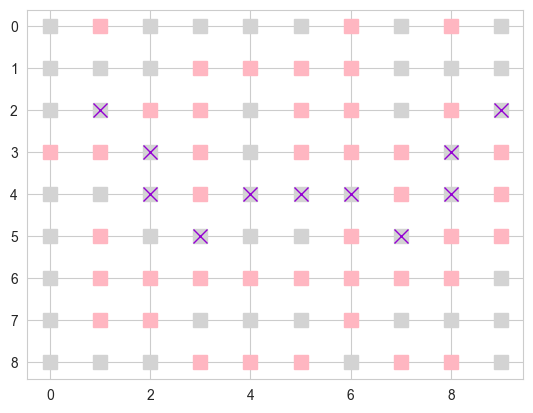

In [24]:
def visualize_grid(grid, path=None):
    fig, ax = plt.subplots()
    for i in range(len(grid)):
        for j in range(len(grid[0])):
            if grid[i][j] == 1:
                ax.plot(j, i, marker='s', color='lightgray', markersize=10)   # unblocked cells
            else:
                ax.plot(j, i, marker='s', color='lightpink', markersize=10)       # blocked cells
    if path:
        for node in path:
            ax.plot(node[1], node[0], marker='x', color='darkviolet', markersize=10) # A* Path
    plt.gca().invert_yaxis()  # Invert y axis to match grid coordinates
    # This function retrieves the current Axes instance from the current figure.
    #The "gca" stands for "get current axes".
    plt.grid(True)
    plt.show()

def main():
    # Define the grid (1 for unblocked, 0 for blocked)
    grid = [
        [1, 0, 1, 1, 1, 1, 0, 1, 0, 1],
        [1, 1, 1, 0, 0, 0, 0, 1, 1, 1],
        [1, 1, 0, 0, 1, 0, 0, 1, 0, 1],
        [0, 0, 1, 0, 1, 0, 0, 0, 1, 0],
        [1, 1, 1, 0, 1, 1, 1, 0, 1, 0],
        [1, 0, 1, 1, 1, 1, 0, 1, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 1],
        [1, 0, 0, 1, 1, 1, 0, 1, 1, 1],
        [1, 1, 1, 0, 0, 0, 1, 0, 0, 1]
    ]

    # Define the source and destination
    src = [2, 9]
    dest = [2, 1]

    # Run the A* search algorithm
    path = a_star_search(grid, src, dest)
    visualize_grid(grid, path)

if __name__ == "__main__":
    main()

**Conclusion**
In this experiment we learnt about A* algorithm which is a powerful search algorithm:
Effectiveness: A* consistently found the optimal paths across the tested scenarios, demonstrating its capability in solving pathfinding problems where a solution exists. This validates its theoretical completeness property.

Efficiency: The informed nature of A* led to significant performance advantages when compared to [specify uninformed algorithms used for comparison]. This highlights the importance of a well-designed heuristic function in guiding the search towards the goal.

Heuristic Impact: The choice of heuristic function had a measurable impact on the number of nodes explored by the algorithm. Heuristics that more closely resembled the true cost [Example: Manhattan distance performing better on grids] resulted in fewer node expansions, leading to faster solutions.

Problem Complexity: As the complexity of the problem space increased [Examples: larger mazes, more obstacles, varying edge costs], the computational time of A* increased. This observation emphasizes the tradeoff between optimality guarantees and execution speed in pathfinding.

